In [1]:
import numpy as np
import os 
import re
import pandas as pd
from keras.preprocessing import sequence
import keras
from tweepy import API
from tweepy import Cursor
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import twitter_credentials as credentials
from tweet_analyser_new import twitterClient, tweetAnalyzer


Using TensorFlow backend.


In [2]:
num2char={'u': 0, 'y': 1, 'h': 2, 'm': 3, ' ': 4, 'v': 5, 'x': 6, 'e': 7, 'j': 8, 'z': 9, 'o': 10, 'b': 11, 'l': 12, 'n': 13, 
        'r': 14, 'f': 15, 'q': 16, 't': 17, 'g': 18, 'p': 19, 'a': 20, 'c': 21, 'k': 22, 'd': 23, 'i': 24, 's': 25, 'w': 26}


In [3]:
def token(sentence, remove_vowels=False, remove_repeat=False, minchars=2):
    tokens = []
#   for t in re.findall("[A-Z]{2,}(?![a-z])|[A-Z][a-z]+(?=[A-Z])|[\w]+",sentence.lower()):
    for t in re.findall("[a-zA-Z]+",sentence.lower()):

        if len(t)>=minchars:
            if remove_vowels:
                t=removeVovels(t)
            if remove_repeat:
                t=removeRepeat(t)
            tokens.append(t)
    return tokens

VOWELS = ['a', 'e', 'i', 'o', 'u']

def removeRepeat(string):
    return re.sub(r'(.)\1+', r'\1\1', string)     

def removeVovels(string):
    return ''.join([l for l in string.lower() if l not in VOWELS])

if __name__ == '__main__':
    pass

def normalize_matrix(matrix):
    pass

In [4]:
key=input('Enter keyword:')
tweets=twitterClient().get_keyworded_tweets(70, key)
tweet_df=tweetAnalyzer().tweets_to_dataframe(tweets)
tweet_df=tweet_df.astype('str')

Enter keyword:India


In [5]:
test_set=tweet_df.iloc[:, 0]
test_set=np.array(test_set)
#test_set=test_set.astype('str')

In [6]:
X_test=[]

for i in test_set:
    print(i)
    line=i.lower()
    line=line.split('\t')
    tokenized_line=token(line[0])
    print(tokenized_line)
    char_list=[]
    for words in tokenized_line:
        for ch in words:
            char_list.append(ch)
        char_list.append(' ')
    print(char_list)
    X_test.append(char_list)

RT @jlxmi: “They wanted to defame India. They wanted western media attention.  And provoke muslim community”. The Organizer confessed today…
['rt', 'jlxmi', 'they', 'wanted', 'to', 'defame', 'india', 'they', 'wanted', 'western', 'media', 'attention', 'and', 'provoke', 'muslim', 'community', 'the', 'organizer', 'confessed', 'today']
['r', 't', ' ', 'j', 'l', 'x', 'm', 'i', ' ', 't', 'h', 'e', 'y', ' ', 'w', 'a', 'n', 't', 'e', 'd', ' ', 't', 'o', ' ', 'd', 'e', 'f', 'a', 'm', 'e', ' ', 'i', 'n', 'd', 'i', 'a', ' ', 't', 'h', 'e', 'y', ' ', 'w', 'a', 'n', 't', 'e', 'd', ' ', 'w', 'e', 's', 't', 'e', 'r', 'n', ' ', 'm', 'e', 'd', 'i', 'a', ' ', 'a', 't', 't', 'e', 'n', 't', 'i', 'o', 'n', ' ', 'a', 'n', 'd', ' ', 'p', 'r', 'o', 'v', 'o', 'k', 'e', ' ', 'm', 'u', 's', 'l', 'i', 'm', ' ', 'c', 'o', 'm', 'm', 'u', 'n', 'i', 't', 'y', ' ', 't', 'h', 'e', ' ', 'o', 'r', 'g', 'a', 'n', 'i', 'z', 'e', 'r', ' ', 'c', 'o', 'n', 'f', 'e', 's', 's', 'e', 'd', ' ', 't', 'o', 'd', 'a', 'y', ' ']
RT @O

In [7]:
X_intTest=[]
for lines in X_test:
	charlist=[]
	for letter in lines:
		charlist.append(num2char[letter])
	X_intTest.append(charlist)

X_intTest = sequence.pad_sequences(X_intTest[:], maxlen=280)
#print(X_intTest)
print(X_intTest.shape)

(70, 280)


In [8]:
model=keras.models.load_model('sentiNet.pt')
pred=model.predict(X_intTest)
y = np.argmax(pred, axis=-1)
print(y)
cn = 0
cp = 0
cneu = 0
for num in y:
    if num==0:
        cn=cn+1
        print('Negative')
    if num==1:
        cneu=cneu+1
        print('Neutral')
    else:
        cp=cp+1
        print('Positive')


W0120 20:10:14.451241 4606109120 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0120 20:10:14.472997 4606109120 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0120 20:10:14.500816 4606109120 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0120 20:10:14.504165 4606109120 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_

[1 1 1 2 0 2 2 0 1 1 2 1 2 2 2 0 1 1 2 2 2 0 2 2 2 2 2 1 2 0 0 2 1 2 1 0 0
 1 0 1 2 1 2 2 1 2 2 2 2 2 1 2 2 2 1 2 1 1 1 1 1 2 2 0 1 0 2 2 2 1]
Neutral
Neutral
Neutral
Positive
Negative
Positive
Positive
Positive
Negative
Positive
Neutral
Neutral
Positive
Neutral
Positive
Positive
Positive
Negative
Positive
Neutral
Neutral
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Neutral
Positive
Negative
Positive
Negative
Positive
Positive
Neutral
Positive
Neutral
Negative
Positive
Negative
Positive
Neutral
Negative
Positive
Neutral
Positive
Neutral
Positive
Positive
Neutral
Positive
Positive
Positive
Positive
Positive
Neutral
Positive
Positive
Positive
Neutral
Positive
Neutral
Neutral
Neutral
Neutral
Neutral
Positive
Positive
Negative
Positive
Neutral
Negative
Positive
Positive
Positive
Positive
Neutral


In [9]:
import matplotlib.pyplot as plt
import numpy as np

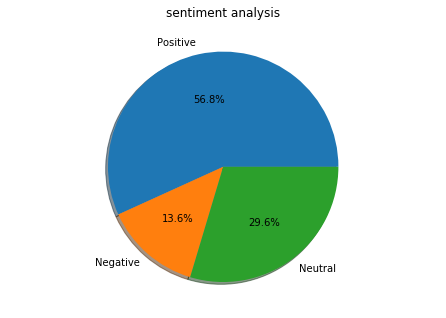

In [10]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = 'Positive', 'Negative', 'Neutral'
sizes = [cp, cn, cneu]
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title('sentiment analysis')
plt.show()

In [11]:
y=np.array(y)

In [12]:
df=pd.DataFrame(y , index=y[:])

In [13]:
df.to_csv('Sentiment_labels.csv')


In [14]:
tweet_df.to_csv('Tweets.csv')